In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.preprocessing import image
from PIL import Image
import io
from datetime import datetime

In [4]:
# Pay attemtion to the path 
base_dir = '../real-vs-fake'
#|--project
#|-----TechLabs-DL-2024
#|----------model.ipynb
#|----------README.md
#|-----real-vs-fake
#|----------test
#|----------train
#|----------valid

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [5]:
batch_size = 32
img_size = (150, 150)
sample_count = 1000

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=['real', 'fake'],
    shuffle=True,
    subset=None,
    seed=42
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=['real', 'fake'],
    shuffle=True,
    subset=None,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=['real', 'fake'],
    shuffle=False
)

train_generator.samples = 2 * sample_count  
train_generator.batch_size = batch_size

Found 102041 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=sample_count // batch_size * 2,  # number of batches per epoch
    epochs=10,
    validation_data=valid_generator,
    validation_steps=sample_count // batch_size
)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 365ms/step - accuracy: 0.5060 - loss: 0.7175 - val_accuracy: 0.4899 - val_loss: 0.6931
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - accuracy: 0.5143 - loss: 0.6924 - val_accuracy: 0.5615 - val_loss: 0.6822
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 334ms/step - accuracy: 0.5524 - loss: 0.6868 - val_accuracy: 0.6099 - val_loss: 0.6526
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.6107 - loss: 0.6621 - val_accuracy: 0.6089 - val_loss: 0.6668
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 350ms/step - accuracy: 0.6080 - loss: 0.6592 - val_accuracy: 0.5887 - val_loss: 0.6685
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 334ms/step - accuracy: 0.6200 - loss: 0.6430 - val_accuracy: 0.6371 - val_loss: 0.6428
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 345ms/step - accuracy: 0.6265 - loss: 0.6403 - val_accuracy: 0.6381 - val_loss: 0.6350
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 345ms/step - accuracy: 0.6398 - loss: 0.6340 - val_accuracy: 0.540

In [8]:
# Evaluate on the Test Set
print("Evaluating on Test Set:")
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc:.2f}")

Y_pred_test = model.predict(test_generator)
y_pred_test = np.round(Y_pred_test).astype(int)

print('Confusion Matrix - Test Set')
print(confusion_matrix(test_generator.classes, y_pred_test))

print('Classification Report - Test Set')
print(classification_report(test_generator.classes, y_pred_test, target_names=['Real', 'Fake']))

# Evaluate on the Validation Set
print("\nEvaluating on Validation Set:")
val_loss, val_acc = model.evaluate(valid_generator, steps=valid_generator.samples // valid_generator.batch_size)
print(f"Validation Accuracy: {val_acc:.2f}")

Y_pred_val = model.predict(valid_generator)
y_pred_val = np.round(Y_pred_val).astype(int)

print('Confusion Matrix - Validation Set')
print(confusion_matrix(valid_generator.classes, y_pred_val))

print('Classification Report - Validation Set')
print(classification_report(valid_generator.classes, y_pred_val, target_names=['Real', 'Fake']))

500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 87ms/step - accuracy: 0.6845 - loss: 0.5976
Test Accuracy: 0.69
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step
Confusion Matrix
[[6853 3147]
 [2975 7025]]
Classification Report
              precision    recall  f1-score   support

        Real       0.70      0.69      0.69     10000
        Fake       0.69      0.70      0.70     10000

    accuracy                           0.69     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.69      0.69      0.69     20000



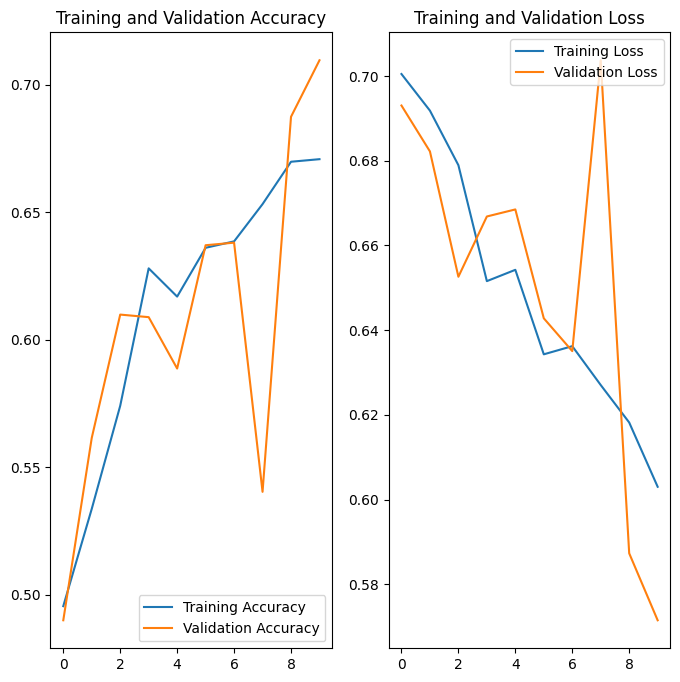

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
# For manual testing and demonstration
# Create an upload button
upload_btn = widgets.FileUpload(accept='image/*', multiple=False)

# Function to process the uploaded image and make a prediction
def on_upload_change(change):
    # Access the uploaded image
    uploaded_file = list(upload_btn.value.values())[0]
    content = uploaded_file['content']
    
    # Open the image
    img = Image.open(io.BytesIO(content))
    img = img.resize((150, 150))  # Resize to match the model's expected input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    
    # Make a prediction
    prediction = model.predict(img_array)
    
    # Display the result
    if prediction < 0.5:
        print(f"The image is predicted to be real with a probability of {1 - prediction[0][0]:.2f}")
    else:
        print(f"The image is predicted to be fake with a probability of {prediction[0][0]:.2f}")

# Connect the function to the upload button
upload_btn.observe(on_upload_change, names='value')

# Display the upload button
display(upload_btn)

FileUpload(value={}, accept='image/*', description='Upload')

In [11]:
# Get time and export new model with timestamp
now = datetime.now()
model.save(f"techLabsModel_{now}.keras")

In [15]:
# Use the following code to load the trained model:
# model = tf.keras.models.load_model('techLabsModel_2024-08-21 19:26:01.876118.keras')